In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import permutation_test_score
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn import metrics
import random

import sys
sys.path.append('../')
import dataimport.prepareDataset as prep

In [2]:
random.seed(141)

are there features which don't have any further content/ don't change over the whole periode


In [3]:
Part_chro=['13','22','10', '18']
Part_reco=['19','20','02','09']

In [4]:
[X_Base,X_Anes,X_Reco,Y_ID_Base,Y_ID_Anes,Y_ID_Reco,
 Y_out_Anes,Y_out_Base,Y_out_Reco ]=prep.prepare_Dataset('data/combined_NEW_dPLI_all_10_1_left_alpha_theta.pickle')

In [5]:
X_Base.head()

,"(w_FC,)","(w_FP,)","(w_FO,)","(w_FT,)","(w_TO,)","(w_TC,)","(w_TP,)","(w_PO,)","(w_PC,)","(w_CO,)",...,"(d_TC,)","(d_TP,)","(d_PO,)","(d_PC,)","(d_CO,)","(d_FF,)","(d_CC,)","(d_PP,)","(d_TT,)","(d_OO,)"
0,0.520710,0.532833,0.509602,0.591770,0.562719,0.512624,0.533130,0.541518,0.511450,0.510751,...,0.513116,0.487709,0.658415,0.624671,0.597769,0.596542,0.615523,0.574396,0.515676,0.535827
1,0.519796,0.557590,0.527756,0.594111,0.560824,0.529521,0.535862,0.536703,0.517674,0.503397,...,0.512697,0.474060,0.600727,0.607056,0.595072,0.594903,0.593595,0.523076,0.475333,0.478067
2,0.504512,0.523333,0.500931,0.574145,0.549571,0.510873,0.545460,0.555764,0.506364,0.489656,...,0.504459,0.530984,0.615712,0.619641,0.579059,0.594220,0.589267,0.564731,0.505590,0.479400
3,0.492030,0.532757,0.522992,0.571895,0.576871,0.511549,0.550265,0.532715,0.497733,0.494872,...,0.509215,0.532839,0.608609,0.586347,0.574985,0.541038,0.576385,0.566640,0.517467,0.549187
4,0.494821,0.543710,0.543552,0.592625,0.608257,0.531602,0.565340,0.516448,0.494579,0.490313,...,0.525178,0.530626,0.586194,0.581380,0.554669,0.561953,0.565413,0.542691,0.509971,0.568333


define 30% test set 
!!!! only used to select the hyperparameters 

In [48]:
#X_train,X_test,Y_train,Y_test=train_test_split(X,Y_out,Y_ID,random_state=0,test_size=0.3)
X_train_Base,X_test_Base,Y_train_Base,Y_test_Base,Y_ID_Base_train,Y_ID_Base_test=train_test_split(X_Base,Y_out_Base,Y_ID_Base,random_state=0,test_size=0.3)
X_train_Reco,X_test_Reco,Y_train_Reco,Y_test_Reco,Y_ID_Reco_train,Y_ID_Reco_test=train_test_split(X_Reco,Y_out_Reco,Y_ID_Reco,random_state=0,test_size=0.3)
X_train_Anes,X_test_Anes,Y_train_Anes,Y_test_Anes,Y_ID_Anes_train,Y_ID_Anes_test=train_test_split(X_Anes,Y_out_Anes,Y_ID_Anes,random_state=0,test_size=0.3)


In [49]:
#lr=LogisticRegression(random_state=0,penalty='l1',C=4,solver='liblinear',max_iter=10000)

#score_B, permutation_scores_B, pvalue_B = permutation_test_score(
#    lr, X_Base,Y_out_Base, scoring="accuracy", n_permutations=100, n_jobs=-1,cv=3)

#score_A, permutation_scores_A, pvalue_A = permutation_test_score(
#    lr, X_Anes,Y_out_Anes, scoring="accuracy", n_permutations=100, n_jobs=-1,cv=3)

#score_R, permutation_scores_R, pvalue_R = permutation_test_score(
#    lr, X_Reco,Y_out_Reco, scoring="accuracy", n_permutations=100, n_jobs=-1,cv=3)



In [50]:
# View histogram of permutation scores
"""
plt.figure(figsize= [15, 6])
plt.subplot(131)
plt.hist(permutation_scores_B, 20, label='Permutation scores Baseline')
ylim = plt.ylim()
plt.plot(2 * [score_B], ylim, '--g', linewidth=3,
         label='Classification Score'
         ' (pvalue %s)' % pvalue_B)
plt.plot(2 * [1. / 2], ylim, '--k', linewidth=3, label='Luck')
plt.legend()
plt.xlabel('Score')

plt.subplot(132)
plt.hist(permutation_scores_A, 20, label='Permutation scores Anesthesia')
ylim = plt.ylim()
plt.plot(2 * [score_A], ylim, '--g', linewidth=3,
         label='Classification Score'
         ' (pvalue %s)' % pvalue_A)
plt.plot(2 * [1. / 2], ylim, '--k', linewidth=3, label='Luck')
plt.legend()
plt.xlabel('Score')

plt.subplot(133)
plt.hist(permutation_scores_R, 20, label='Permutation scores Recovery')
ylim = plt.ylim()
plt.plot(2 * [score_R], ylim, '--g', linewidth=3,
         label='Classification Score'
         ' (pvalue %s)' % pvalue_R)
plt.plot(2 * [1. / 2], ylim, '--k', linewidth=3, label='Luck')

plt.legend()
plt.xlabel('Score')
plt.savefig('combined_LogReg_permutation.png',dpi=150)
"""

"\nplt.figure(figsize= [15, 6])\nplt.subplot(131)\nplt.hist(permutation_scores_B, 20, label='Permutation scores Baseline')\nylim = plt.ylim()\nplt.plot(2 * [score_B], ylim, '--g', linewidth=3,\n         label='Classification Score'\n         ' (pvalue %s)' % pvalue_B)\nplt.plot(2 * [1. / 2], ylim, '--k', linewidth=3, label='Luck')\nplt.legend()\nplt.xlabel('Score')\n\nplt.subplot(132)\nplt.hist(permutation_scores_A, 20, label='Permutation scores Anesthesia')\nylim = plt.ylim()\nplt.plot(2 * [score_A], ylim, '--g', linewidth=3,\n         label='Classification Score'\n         ' (pvalue %s)' % pvalue_A)\nplt.plot(2 * [1. / 2], ylim, '--k', linewidth=3, label='Luck')\nplt.legend()\nplt.xlabel('Score')\n\nplt.subplot(133)\nplt.hist(permutation_scores_R, 20, label='Permutation scores Recovery')\nylim = plt.ylim()\nplt.plot(2 * [score_R], ylim, '--g', linewidth=3,\n         label='Classification Score'\n         ' (pvalue %s)' % pvalue_R)\nplt.plot(2 * [1. / 2], ylim, '--k', linewidth=3, lab

In [9]:
"""
data = [[score_B, pvalue_B], 
        [score_A, pvalue_A],
        [score_R, pvalue_R]]

pd.DataFrame(data, columns=["permutation LR", "pvalue"],index=['Baseline','Anesthesia','Recovery'])
"""

'\ndata = [[score_B, pvalue_B], \n        [score_A, pvalue_A],\n        [score_R, pvalue_R]]\n\npd.DataFrame(data, columns=["permutation LR", "pvalue"],index=[\'Baseline\',\'Anesthesia\',\'Recovery\'])\n'

LOGISTIC REGRESSION
  I Hyperparameter search

In [39]:


cs=np.arange(1,8,0.5)
lr_accuracy_Base=[]
lr_accuracy_Anes=[]
lr_accuracy_Reco=[]

In [40]:
for c in cs:
    lr=LogisticRegression(random_state=0,penalty='l1',C=c,solver='liblinear',max_iter=10000)
    lr.fit(X_train_Base,Y_train_Base)
    P_lr=lr.predict(X_test_Base)
    lr_accuracy_Base.append(metrics.accuracy_score(Y_test_Base, P_lr))

    lr=LogisticRegression(random_state=0,penalty='l1',C=c,solver='liblinear',max_iter=10000)
    lr.fit(X_train_Anes,Y_train_Anes)
    P_lr=lr.predict(X_test_Anes)
    lr_accuracy_Anes.append(metrics.accuracy_score(Y_test_Anes, P_lr))

    lr=LogisticRegression(random_state=0,penalty='l1',C=c,solver='liblinear',max_iter=10000)
    lr.fit(X_train_Reco,Y_train_Reco)
    P_lr=lr.predict(X_test_Reco)
    lr_accuracy_Reco.append(metrics.accuracy_score(Y_test_Reco, P_lr))

#feat_importances_Reco = pd.Series(lr.coef_[0], index=X.columns)
#feat_importances_Reco.plot(kind='barh')

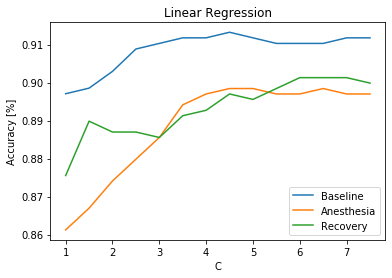

In [41]:
%matplotlib inline

plt.plot(cs,lr_accuracy_Base)
plt.plot(cs,lr_accuracy_Anes)
plt.plot(cs,lr_accuracy_Reco)
plt.ylabel('Accuracy [%]')
plt.xlabel('C')
plt.title('Linear Regression')
plt.legend(['Baseline','Anesthesia','Recovery'])
plt.savefig('combined_LogReg_hyper.png',dpi=150)
plt.show()



NEW TRY 

In [69]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=1000, random_state=0)
clf.fit(X_train_Base,Y_train_Base)
P_lr=clf.predict(X_test_Base)
print(clf.score(X_test_Base,Y_test_Base))

lr = AdaBoostClassifier(n_estimators=1000, random_state=0)
lr.fit(tmp_X_train_Base, tmp_Y_train_Base)
cv_LR_Base.append(lr.score(tmp_X_test_Base, tmp_Y_test_Base))


0.9308823529411765


AttributeError: 'AdaBoostClassifier' object has no attribute 'coef_'

In [71]:
lr.score(tmp_X_test_Base, tmp_Y_test_Base)

0.8901734104046243

In [75]:
from sklearn.ensemble import AdaBoostClassifier

cv_LR_Base=[]
cv_LR_Anes=[]
cv_LR_Reco=[]


for r in range(0,4):
    for c in range (0,4):
        tmp_X_test_Base=X_Base[(Y_ID_Base == Part_reco[r]) | (Y_ID_Base == Part_chro[c])]
        tmp_X_train_Base=X_Base[(Y_ID_Base != Part_reco[r]) & (Y_ID_Base != Part_chro[c])]
        tmp_Y_test_Base=Y_out_Base[(Y_ID_Base == Part_reco[r]) | (Y_ID_Base == Part_chro[c])]
        tmp_Y_train_Base=Y_out_Base[(Y_ID_Base != Part_reco[r]) & (Y_ID_Base != Part_chro[c])]
        
        tmp_X_test_Anes=X_Anes[(Y_ID_Anes == Part_reco[r]) | (Y_ID_Anes == Part_chro[c])]
        tmp_X_train_Anes=X_Anes[(Y_ID_Anes != Part_reco[r]) & (Y_ID_Anes != Part_chro[c])]
        tmp_Y_test_Anes=Y_out_Anes[(Y_ID_Anes == Part_reco[r]) | (Y_ID_Anes == Part_chro[c])]
        tmp_Y_train_Anes=Y_out_Anes[(Y_ID_Anes != Part_reco[r]) & (Y_ID_Anes != Part_chro[c])]

        tmp_X_test_Reco=X_Reco[(Y_ID_Reco == Part_reco[r]) | (Y_ID_Reco == Part_chro[c])]
        tmp_X_train_Reco=X_Reco[(Y_ID_Reco != Part_reco[r]) & (Y_ID_Reco != Part_chro[c])]
        tmp_Y_test_Reco=Y_out_Reco[(Y_ID_Reco == Part_reco[r]) | (Y_ID_Reco == Part_chro[c])]
        tmp_Y_train_Reco=Y_out_Reco[(Y_ID_Reco != Part_reco[r]) & (Y_ID_Reco != Part_chro[c])]

        lr = AdaBoostClassifier(n_estimators=1000, random_state=0)
        lr.fit(tmp_X_train_Base, tmp_Y_train_Base)
        cv_LR_Base.append(lr.score(tmp_X_test_Base, tmp_Y_test_Base))
        
        lr = AdaBoostClassifier(n_estimators=1000, random_state=0)
        lr.fit(tmp_X_train_Anes, tmp_Y_train_Anes)
        cv_LR_Anes.append(lr.score(tmp_X_test_Anes, tmp_Y_test_Anes))
        
        lr = AdaBoostClassifier(n_estimators=1000, random_state=0)
        lr.fit(tmp_X_train_Reco, tmp_Y_train_Reco)
        cv_LR_Reco.append(lr.score(tmp_X_test_Reco, tmp_Y_test_Reco))
        

Text(0.5, 1.0, 'combined_CV')

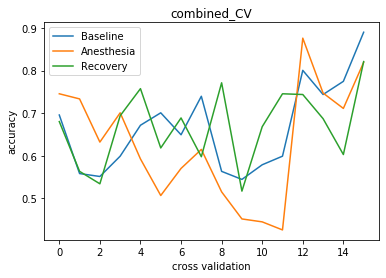

In [76]:
plt.figure()
plt.plot(cv_LR_Base)
plt.plot(cv_LR_Anes)
plt.plot(cv_LR_Reco)
plt.legend(['Baseline','Anesthesia','Recovery'])
plt.xlabel('cross validation')
plt.ylabel('accuracy')
plt.title('combined_CV')
#plt.savefig('combined_LogRefg_CV.png',dpi=150)

In [ ]:
np.mean(cv_LR_Base)

In [ ]:
from sklearn.linear_model import LogisticRegression


cv_LR_Base=[]
cv_LR_Anes=[]
cv_LR_Reco=[]

FI_LR_Base=[]
FI_LR_Anes=[]
FI_LR_Reco=[]

for r in range(0,4):
    for c in range (0,4):
        tmp_X_test_Base=X_Base[(Y_ID_Base == Part_reco[r]) | (Y_ID_Base == Part_chro[c])]
        tmp_X_train_Base=X_Base[(Y_ID_Base != Part_reco[r]) & (Y_ID_Base != Part_chro[c])]
        tmp_Y_test_Base=Y_out_Base[(Y_ID_Base == Part_reco[r]) | (Y_ID_Base == Part_chro[c])]
        tmp_Y_train_Base=Y_out_Base[(Y_ID_Base != Part_reco[r]) & (Y_ID_Base != Part_chro[c])]
        
        tmp_X_test_Anes=X_Anes[(Y_ID_Anes == Part_reco[r]) | (Y_ID_Anes == Part_chro[c])]
        tmp_X_train_Anes=X_Anes[(Y_ID_Anes != Part_reco[r]) & (Y_ID_Anes != Part_chro[c])]
        tmp_Y_test_Anes=Y_out_Anes[(Y_ID_Anes == Part_reco[r]) | (Y_ID_Anes == Part_chro[c])]
        tmp_Y_train_Anes=Y_out_Anes[(Y_ID_Anes != Part_reco[r]) & (Y_ID_Anes != Part_chro[c])]

        tmp_X_test_Reco=X_Reco[(Y_ID_Reco == Part_reco[r]) | (Y_ID_Reco == Part_chro[c])]
        tmp_X_train_Reco=X_Reco[(Y_ID_Reco != Part_reco[r]) & (Y_ID_Reco != Part_chro[c])]
        tmp_Y_test_Reco=Y_out_Reco[(Y_ID_Reco == Part_reco[r]) | (Y_ID_Reco == Part_chro[c])]
        tmp_Y_train_Reco=Y_out_Reco[(Y_ID_Reco != Part_reco[r]) & (Y_ID_Reco != Part_chro[c])]

        lr = LogisticRegression(random_state=0, penalty='l1', C=4,max_iter=1000,solver='liblinear')
        lr.fit(tmp_X_train_Base, tmp_Y_train_Base)
        P_lr = lr.predict(tmp_X_test_Base)
        cv_LR_Base.append(metrics.accuracy_score(tmp_Y_test_Base, P_lr))
        FI_LR_Base.append(lr.coef_)
        

        lr = LogisticRegression(random_state=0, penalty='l1', C=4,max_iter=1000,solver='liblinear')
        lr.fit(tmp_X_train_Anes, tmp_Y_train_Anes)
        P_lr = lr.predict(tmp_X_test_Anes)
        cv_LR_Anes.append(metrics.accuracy_score(tmp_Y_test_Anes, P_lr))
        FI_LR_Anes.append(lr.coef_)
        
        lr = LogisticRegression(random_state=0, penalty='l1', C=4,max_iter=1000,solver='liblinear')
        lr.fit(tmp_X_train_Reco, tmp_Y_train_Reco)
        P_lr = lr.predict(tmp_X_test_Reco)
        cv_LR_Reco.append(metrics.accuracy_score(tmp_Y_test_Reco, P_lr))
        FI_LR_Reco.append(lr.coef_)
        

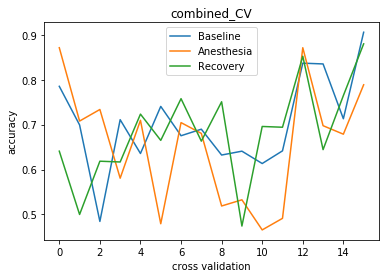

In [15]:
plt.figure()
plt.plot(cv_LR_Base)
plt.plot(cv_LR_Anes)
plt.plot(cv_LR_Reco)
plt.legend(['Baseline','Anesthesia','Recovery'])
plt.xlabel('cross validation')
plt.ylabel('accuracy')
plt.title('combined_CV')
plt.savefig('combined_LogRefg_CV.png',dpi=150)

In [16]:
right_Anes = np.where(np.array(cv_LR_Anes) > 0.5)[0]
right_Base = np.where(np.array(cv_LR_Base) > 0.5)[0]
right_Reco = np.where(np.array(cv_LR_Reco) > 0.4)[0]



In [17]:
len(FI_LR_Base)


16

In [18]:
FI_LR_Base= list(FI_LR_Base[i] for i in right_Base)
FI_LR_Anes= list(FI_LR_Anes[i] for i in right_Anes)
FI_LR_Reco= list(FI_LR_Reco[i] for i in right_Reco)




In [19]:
feat_importances_Base_LR = pd.Series(abs(np.mean(FI_LR_Base[0:],axis=0)[0]), index=X_Base.columns)
feat_importances_Anes_LR = pd.Series(abs(np.mean(FI_LR_Anes[0:],axis=0)[0]), index=X_Base.columns)
feat_importances_Reco_LR = pd.Series(abs(np.mean(FI_LR_Reco[0:],axis=0)[0]), index=X_Base.columns)


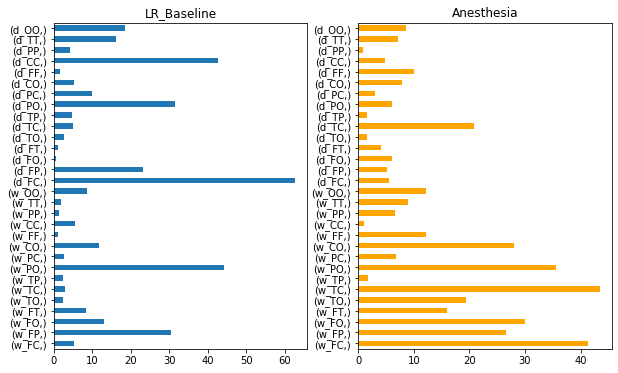

In [20]:
plt.figure(figsize= [10, 6])
plt.subplot(121)
feat_importances_Base_LR.plot(kind='barh')
plt.title('LR_Baseline')
plt.subplot(122)
feat_importances_Anes_LR.plot(kind='barh',color='orange')
plt.title('Anesthesia')
plt.savefig('combined_LogRefg_features.png',dpi=150)
#plt.subplot(133)
#feat_importances_Reco_LR.plot(kind='barh',color='green')
#plt.title('Recovery')

In [21]:
feat_importances_Base_LR = pd.Series(abs(np.mean(FI_LR_Base[0:],axis=0)[0]), index=X_Base.columns)
feat_importances_Anes_LR = pd.Series(abs(np.mean(FI_LR_Anes[0:],axis=0)[0]), index=X_Base.columns)
feat_importances_Reco_LR = pd.Series(abs(np.mean(FI_LR_Reco[0:],axis=0)[0]), index=X_Base.columns)


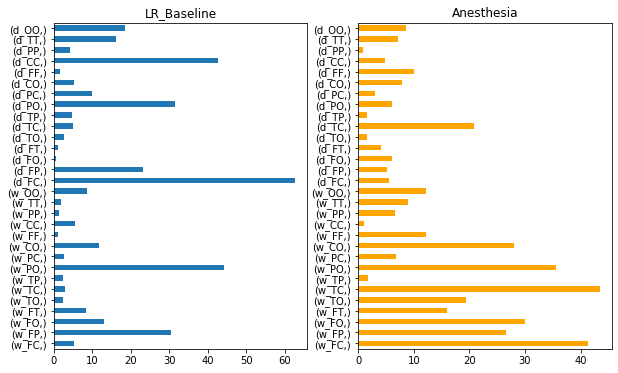

In [22]:
plt.figure(figsize= [10, 6])
plt.subplot(121)
feat_importances_Base_LR.plot(kind='barh')
plt.title('LR_Baseline')
plt.subplot(122)
feat_importances_Anes_LR.plot(kind='barh',color='orange')
plt.title('Anesthesia')
plt.savefig('combined_LogRefg_features.png',dpi=150)
#plt.subplot(133)
#feat_importances_Reco_LR.plot(kind='barh',color='green')
#plt.title('Recovery')

In [23]:
np.mean(cv_LR_Base)
np.std(cv_LR_Base)

np.mean(cv_LR_Anes)
np.std(cv_LR_Anes)

np.mean(cv_LR_Reco)
np.std(cv_LR_Reco)


0.10478810802979528

SVM (sklearn)


In [24]:
cs=np.arange(0.3,6,0.2)

svm_accuracy_Base=[]
svm_accuracy_Anes=[]
svm_accuracy_Reco=[]

for c in cs:
    svm_model = svm.LinearSVC(C=c, loss="hinge" , max_iter=100000)
    svm_model.fit(X_train_Base,Y_train_Base)
    P_lr=svm_model.predict(X_test_Base)
    svm_accuracy_Base.append(metrics.accuracy_score(Y_test_Base, P_lr))

    svm_model = svm.LinearSVC(C=c, loss="hinge", max_iter=100000)
    svm_model.fit(X_train_Anes,Y_train_Anes)
    P_lr=svm_model.predict(X_test_Anes)
    svm_accuracy_Anes.append(metrics.accuracy_score(Y_test_Anes, P_lr))

    svm_model = svm.LinearSVC(C=c, loss="hinge", max_iter=100000)
    svm_model.fit(X_train_Reco,Y_train_Reco)
    P_lr=svm_model.predict(X_test_Reco)
    svm_accuracy_Reco.append(metrics.accuracy_score(Y_test_Reco, P_lr))


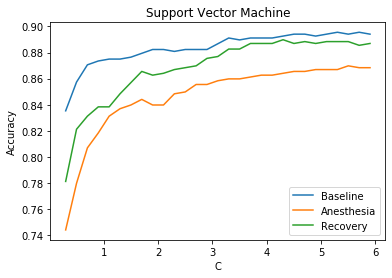

<Figure size 432x288 with 0 Axes>

In [25]:

plt.plot(cs,svm_accuracy_Base)
plt.plot(cs,svm_accuracy_Anes)
plt.plot(cs,svm_accuracy_Reco)
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.title('Support Vector Machine')
plt.legend(['Baseline','Anesthesia','Recovery'])
plt.show()
plt.savefig('combined_SVM_hyper.png',dpi=150)

In [26]:
cv_SVM_Base=[]
cv_SVM_Anes=[]
cv_SVM_Reco=[]

FI_SVM_Base=[]
FI_SVM_Anes=[]
FI_SVM_Reco=[]


for r in range(0,4):
    for c in range (0,4):
        tmp_X_test_Base=X_Base[(Y_ID_Base == Part_reco[r]) | (Y_ID_Base == Part_chro[c])]
        tmp_X_train_Base=X_Base[(Y_ID_Base != Part_reco[r]) & (Y_ID_Base != Part_chro[c])]
        tmp_Y_test_Base=Y_out_Base[(Y_ID_Base == Part_reco[r]) | (Y_ID_Base == Part_chro[c])]
        tmp_Y_train_Base=Y_out_Base[(Y_ID_Base != Part_reco[r]) & (Y_ID_Base != Part_chro[c])]

        tmp_X_test_Anes=X_Anes[(Y_ID_Anes == Part_reco[r]) | (Y_ID_Anes == Part_chro[c])]
        tmp_X_train_Anes=X_Anes[(Y_ID_Anes != Part_reco[r]) & (Y_ID_Anes != Part_chro[c])]
        tmp_Y_test_Anes=Y_out_Anes[(Y_ID_Anes == Part_reco[r]) | (Y_ID_Anes == Part_chro[c])]
        tmp_Y_train_Anes=Y_out_Anes[(Y_ID_Anes != Part_reco[r]) & (Y_ID_Anes != Part_chro[c])]

        tmp_X_test_Reco=X_Reco[(Y_ID_Reco == Part_reco[r]) | (Y_ID_Reco == Part_chro[c])]
        tmp_X_train_Reco=X_Reco[(Y_ID_Reco != Part_reco[r]) & (Y_ID_Reco != Part_chro[c])]
        tmp_Y_test_Reco=Y_out_Reco[(Y_ID_Reco == Part_reco[r]) | (Y_ID_Reco == Part_chro[c])]
        tmp_Y_train_Reco=Y_out_Reco[(Y_ID_Reco != Part_reco[r]) & (Y_ID_Reco != Part_chro[c])]

        svm_model = svm.LinearSVC(C=4, loss="hinge", max_iter=100000)
        svm_model.fit(tmp_X_train_Base, tmp_Y_train_Base)
        P_lr = svm_model.predict(tmp_X_test_Base)
        cv_SVM_Base.append(metrics.accuracy_score(tmp_Y_test_Base, P_lr))
        FI_SVM_Base.append(svm_model.coef_.flatten())

        svm_model = svm.LinearSVC(C=4, loss="hinge", max_iter=100000)
        svm_model.fit(tmp_X_train_Anes, tmp_Y_train_Anes)
        P_lr = svm_model.predict(tmp_X_test_Anes)
        cv_SVM_Anes.append(metrics.accuracy_score(tmp_Y_test_Anes, P_lr))
        FI_SVM_Anes.append(svm_model.coef_.flatten())

        svm_model = svm.LinearSVC(C=4, loss="hinge", max_iter=100000)
        svm_model.fit(tmp_X_train_Reco, tmp_Y_train_Reco)
        P_lr = svm_model.predict(tmp_X_test_Reco)
        cv_SVM_Reco.append(metrics.accuracy_score(tmp_Y_test_Reco, P_lr))
        FI_SVM_Reco.append(svm_model.coef_.flatten())

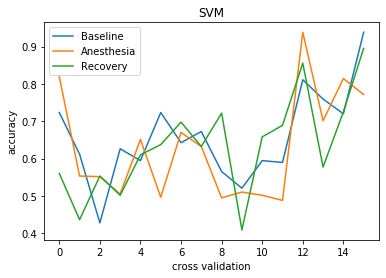

In [27]:
plt.plot(cv_SVM_Base)
plt.plot(cv_SVM_Anes)
plt.plot(cv_SVM_Reco)
plt.legend(['Baseline','Anesthesia','Recovery'])
plt.xlabel('cross validation')
plt.ylabel('accuracy')
plt.title('SVM')
plt.savefig('combined_SVM_CV.png',dpi=150)

In [28]:
np.mean(cv_SVM_Base)

0.6575467294360686

In [29]:
np.std(cv_SVM_Base)

0.11764873056354756

In [30]:
np.mean(cv_SVM_Anes)

0.6312285223367697

In [31]:
np.std(cv_SVM_Anes)

0.1384439909418587

In [32]:
np.mean(cv_SVM_Reco)

0.6349871134020618

In [33]:
np.std(cv_SVM_Reco)

0.12843709953678806

In [34]:
right_Anes = np.where(np.array(cv_SVM_Anes) > 0.5)[0]
right_Base = np.where(np.array(cv_SVM_Base) > 0.5)[0]
right_Reco = np.where(np.array(cv_SVM_Reco) > 0.5)[0]


FI_SVM_Base=pd.DataFrame(FI_SVM_Base)
FI_SVM_Anes=pd.DataFrame(FI_SVM_Anes)
FI_SVM_Reco=pd.DataFrame(FI_SVM_Reco)

feat_importances_Base_SVM_b = pd.Series(np.array(abs(np.mean(FI_SVM_Base.iloc[right_Base,:],axis=0))), index=X_Base.columns)
feat_importances_Anes_SVM_b = pd.Series(np.array(abs(np.mean(FI_SVM_Anes.iloc[right_Anes,:],axis=0))), index=X_Base.columns)
feat_importances_Reco_SVM_b = pd.Series(np.array(abs(np.mean(FI_SVM_Reco.iloc[right_Reco,:],axis=0))), index=X_Base.columns)

feat_importances_Base_SVM = pd.Series(np.array((np.mean(FI_SVM_Base.iloc[right_Base,:],axis=0))), index=X_Base.columns)
feat_importances_Anes_SVM = pd.Series(np.array((np.mean(FI_SVM_Anes.iloc[right_Anes,:],axis=0))), index=X_Base.columns)
feat_importances_Reco_SVM = pd.Series(np.array((np.mean(FI_SVM_Reco.iloc[right_Reco,:],axis=0))), index=X_Base.columns)




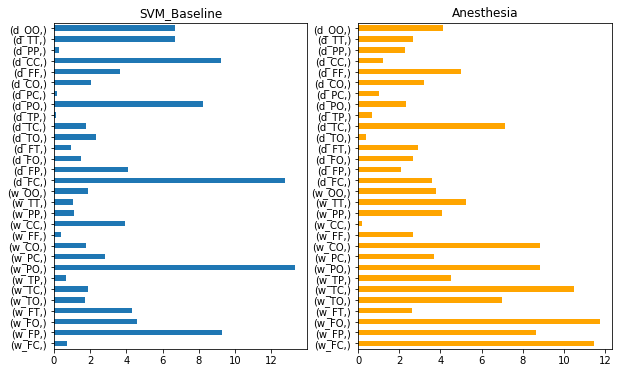

In [35]:
plt.figure(figsize= [10, 6])
plt.subplot(121)
feat_importances_Base_SVM_b.plot(kind='barh')
plt.title('SVM_Baseline')
plt.subplot(122)
feat_importances_Anes_SVM_b.plot(kind='barh',color='orange')
plt.title('Anesthesia')
plt.savefig('combined_SVM_features.png',dpi=150)
#plt.subplot(133)
#feat_importances_Reco_SVM_b.plot(kind='barh',color='green')
#plt.title('Recovery')

Decision Tree

In [36]:
from sklearn import tree
import graphviz

#BAse
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_Base,Y_out_Base)
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=X_Base.columns, class_names=['Chronic', 'recovered'],
                                filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('combined_Decision_Tree_Base')

#Anes
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_Anes,Y_out_Anes)
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=X_Base.columns, class_names=['Chronic', 'recovered'],
                                filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('combined_Decision_Tree_Anes')



'combined_Decision_Tree_Anes.pdf'

In [37]:
data = [[np.max(lr_accuracy_Base), np.max(svm_accuracy_Base)], 
        [np.max(lr_accuracy_Anes), np.max(svm_accuracy_Anes)],
        [np.max(lr_accuracy_Reco), np.max(svm_accuracy_Reco)]]

pd.DataFrame(data, columns=["test_Logistic Regression", "test_SVM"],index=['Baseline','Anesthesia','Recovery'])

,test_Logistic Regression,test_SVM
Baseline,0.911765,0.895588
Anesthesia,0.894134,0.869814
Recovery,0.891273,0.889843


In [77]:
data = [[np.mean(cv_LR_Base), np.mean(cv_SVM_Base)], 
        [np.mean(cv_LR_Anes), np.mean(cv_SVM_Anes)],
        [np.mean(cv_LR_Reco), np.mean(cv_SVM_Reco)]]

pd.DataFrame(data, columns=["test_Logistic Regression", "test_SVM"],index=['Baseline','Anesthesia','Recovery'])

,test_Logistic Regression,test_SVM
Baseline,0.666473,0.657547
Anesthesia,0.630692,0.631229
Recovery,0.668385,0.634987
